In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 6

Let $f(x)$ be a sufficiently smooth function, and $\tilde f(x)$ be a small perturbation of $f$. Similarly, let $p_m(x)$ and $\tilde p_m(x)$ be their respective Lagrange interpolating polynomials. Then we have $$\large {\|p_m(x) - \tilde p_m(x)\|}_\infty \le \Lambda_m \max_{j \in \{0, \dotsc, m\}} |f(x_j) - \tilde f(x_j)|,$$ where $\Lambda_m$ is the Lebesgue constant $$\large \Lambda_m = {\left\| \sum_{k=0}^m |L_k(x)| \right\|}_\infty.$$

### Q6 (a)

Write a Python function `Lambda(m)` that takes a number $m \in \mathbb{N}$ with $m \ge 2$ and computes the Lebesgue constant for $m+1$ equally spaced nodes on the interval $x \in [-1, 1]$ including the boundaries. Approximate the $\infty$-norm by taking the maximum over 100 values of $x$. Use your implementation to compute $\Lambda_{10}$.

In [2]:
def L_k(nodes, k, x):
    all_j = np.arange(0, len(nodes))
    j = all_j[all_j != k]
    return np.multiply.reduce((x - nodes[j]) / (nodes[k] - nodes[j]))


def Lambda_with_nodes(nodes):
    def one_sum(x):
        return np.sum(
            [np.abs(L_k(nodes, k, x)) for k in np.arange(0, len(nodes))]
        )
        
    xs = np.array(list(map(one_sum, np.linspace(-1, 1, 1000))))
    return np.maximum.reduce(xs)

In [3]:
def Lambda(m):
    assert m >= 2, "Lambda(m) needs m >= 2"
    
    return Lambda_with_nodes(np.linspace(-1, 1, m + 1))

In [4]:
print("Lambda_{10} =", Lambda(10))

Lambda_{10} = 29.897758816015603


### Q6 (b)

Use this function to plot $\Lambda_m$ for equally spaced grids against $m$ for values of $m$ up to 30, and with logarithmic scaling on the $y$-axis. Show in your plot that this $\Lambda_m$ behaves like $$\large \Lambda_m \sim \frac{2^m}{m \ln m}$$ up to an unimportant multiplicative constant. Comment on what this result has to do with numerical well-posedness, stability, and convergence.

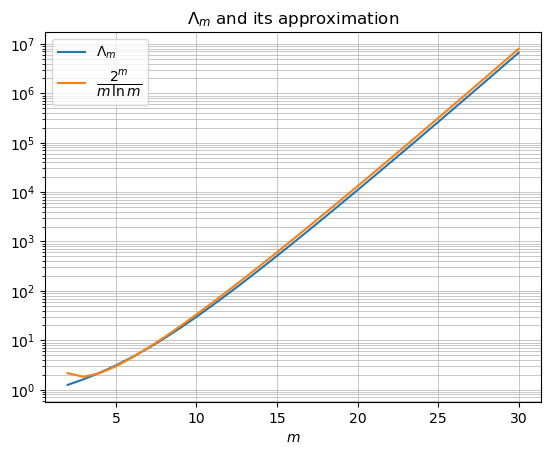

In [5]:
def plot_Lambda_m() -> None:
    m = np.arange(2, 31)
    Lm = np.array(list(map(Lambda, m)))
    approx = 0.75 * (2**m / (m * np.log(m)))

    plt.semilogy(m, Lm, label=r"$\Lambda_m$")
    plt.semilogy(m, approx, label=r"$\dfrac{2^m}{m \, \ln m}$")

    plt.grid(True, which='both', linestyle='-', linewidth=0.5)
    
    plt.title(r"$\Lambda_m$ and its approximation")
    plt.legend()
    plt.xlabel("$m$")

    plt.show()
    plt.clf()
    plt.close()


plot_Lambda_m()

TODO: Comment

### Q6 (c)

Now write a new function `LambdaC(m)` that computes the Lebesgue constant for $m \in \mathbb{N}$ with $m \ge 2$ as above, but on nodes located at $$\large x_i = \cos\left( \frac{i \pi}m \right) \qquad \text{where } i \in \{0, \dotsc, m\}.$$
Plot this new constant against $m$ for 20 values of $m$ up to 200. Compare this against $\dfrac2\pi \ln m$, up to an unimportant additive constant. What do you conclude, in comparison to the results above?

In [6]:
def LambdaC(m):
    assert m >= 2, "LambdaC(m) needs m >= 2"
    
    i = np.arange(0, m + 1)
    return Lambda_with_nodes(np.cos(i * np.pi / m))

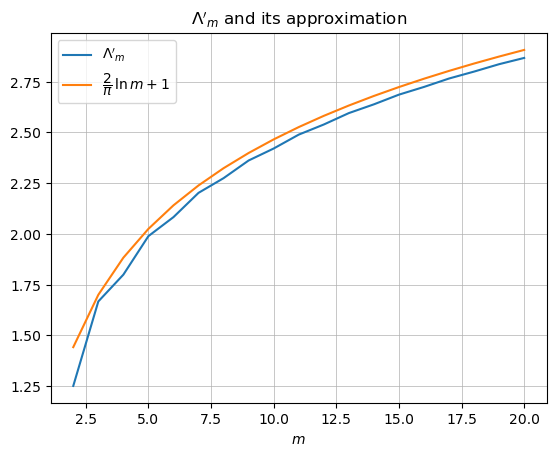

In [7]:
def plot_LambdaC_m() -> None:
    m = np.arange(2, 21)
    Lm = np.array(list(map(LambdaC, m)))
    approx = (2 / np.pi) * np.log(m) + 1

    plt.plot(m, Lm, label=r"$\Lambda'_m$")
    plt.plot(m, approx, label=r"$\dfrac{2}{\pi} \, \ln m + 1$")

    plt.grid(True, which='both', linestyle='-', linewidth=0.5)
    
    plt.title(r"$\Lambda'_m$ and its approximation")
    plt.legend()
    plt.xlabel("$m$")

    plt.show()
    plt.clf()
    plt.close()


plot_LambdaC_m()

TODO: Comment

# Question 7

The formula given in **Q4** allows for a recursive definition of the Lagrange interpolating polynomial. In this problem, we want to implement this recursive formula.

### Q7 (a)

Implement a function `recursive_f(f, nodes)` which takes a function $f$ and an array of nodes $x = (x_0, \dotsc, x_k)$ and returns $f[x_0, \dotsc, x_k]$ as defined in **Q4**. Use this to compute $f[0, 1, 2, 3]$ for $f(x) = \sin x$.

In [ ]:
def recursive_f(f, nodes):
    # TODO
    pass

In [ ]:
# TODO
print("f[0, 1, 2, 3]")

### Q7 (b

Now write a function `qk(f, nodes, k, x)` which computes the polynomial $q_k(x)$ as defined in **Q4**. You can make use of the function you implemented for the previous problem.

Use this to plot into a single figure, for $f(x) = \sqrt x$ and the nodes $x = (0, 1, 2, 3, 4)$, the polynomials $q_k(x)$ for $k \in \{0, 1, 2, 3, 4\}$ on the interval $x \in [0, 5]$. Make sure to plot $f(x)$ for comparison, and plot the locations of all the nodes into the same plot as well.

In [ ]:
def qk(f, nodes, k, x):
    # TODO
    pass

In [ ]:
# TODO: Plot

# Question 8

Implement three functions `midpoint(f, a, b)`, `trapezoidal(f, a, b)`, and `simpson(f, a, b)` which respectively implement the midpoint, trapezoidal, and Cavalieri–Simpson quadrature formulas for the approximating the integral $$\large I(f) = \int_a^b f(x) \, \mathrm d x.$$

In [ ]:
def midpoint(f, a, b):
    # TODO
    pass


def trapezoidal(f, a, b):
    # TODO
    pass


def simpson(f, a, b):
    # TODO
    pass

### Q8 (a)

Use all three functions to approximate the integral of $f(x) = \tanh(x)$ on the interval $[0, 1]$ and compare against the exact result. Collect your results in a table with the columns "Method", "Value", and "Error", giving each quadrature's name, its value $I_n(f)$, and its absolute error $|I_n(f) - I(f)|$, rounded to 3 significant digits. Comment on your results.

In [ ]:
# TODO: Approximate

| Method | Value | Error |
| --- | --- | --- |
| Midpoint | TODO | TODO |
| Trapezoidal | TODO | TODO |
| Simpson | TODO | TODO |

TODO: Comment

### Q8 (b)

On the interval $[0, h]$ for some $h > 0$, use again all three functions to compute the integral of the function $f(x) = \dfrac{1}{1 + x^2}$ for values $h = 2^{-k} with $k \in \{0, \dotsc, 10\}$. Compute also the exact results for these values of $h$.

Plot the absolute value of the error of the three quadrature rules in a log-log plot against $h$. What do you observe for their scaling by comparing against $h^\gamma$ for appropriately chosen values of $\gamma$? Interpret your results by stating which quadrature scales with $h$ to what order, and relate this to the results derived in lectures.

In [ ]:
# TODO: Compute

In [ ]:
# TODO: Plot

TODO: Comment

### Q8 (c)

Quantify the above by computing the experimental error of convergence (EOC) for each method. Show the results in a table with columns "$h$", "Midpoint", "Trapezoid", "Simpson", and each row giving the value of $h$ and the EOC for each method, to a sensible accuracy.

In [ ]:
# TODO: Compute

| $h$ | Midpoint | Trapezoid | Simpson |
| --- | --- | --- | --- |
| $1$ | TODO | TODO | TODO |
| $1/2$ | TODO | TODO | TODO |
| $1/4$ | TODO | TODO | TODO |
| $1/8$ | TODO | TODO | TODO |
| $1/16$ | TODO | TODO | TODO |
| $1/32$ | TODO | TODO | TODO |
| $1/64$ | TODO | TODO | TODO |
| $1/128$ | TODO | TODO | TODO |
| $1/256$ | TODO | TODO | TODO |
| $1/512$ | TODO | TODO | TODO |
| $1/1024$ | TODO | TODO | TODO |